In [38]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import itertools


# Read in Excel Data
EXCEL_FILE = 'src/results/aggregated_results.xlsx'
total_df = pd.read_excel(EXCEL_FILE, sheet_name = 'Sheet1')
df = total_df[total_df['Instance'].str.contains('network_1')]
#df = total_df[total_df['Instance'].str.contains('network_2')]
#df = total_df[total_df['Instance'].str.contains('network_3')]
#df = total_df[total_df['Instance'].str.contains('network_4')]
print(df.head(10))

             Instance       Formulation  MILP Objective  Upper Bound  \
0  network_1_0_25_1_1  F9_UB_YS_Group_K          2000.0       2000.0   
1  network_1_1_25_1_1  F9_UB_YS_Group_K          1956.0       1956.0   
2  network_1_2_25_1_1  F9_UB_YS_Group_K          1956.0       1956.0   
3  network_1_0_30_1_1  F9_UB_YS_Group_K          2500.0       2500.0   
4  network_1_1_30_1_1  F9_UB_YS_Group_K          2484.0       2484.0   
5  network_1_2_30_1_1  F9_UB_YS_Group_K          2484.0       2484.0   
6  network_1_0_35_1_1  F9_UB_YS_Group_K          2916.0       2916.0   
7  network_1_1_35_1_1  F9_UB_YS_Group_K          2916.0       2916.0   
8  network_1_2_35_1_1  F9_UB_YS_Group_K          2916.0       2916.0   
9  network_1_1_40_1_1  F9_UB_YS_Group_K          3440.0       3440.2   

   Relative Gap  Time (s) MILP Status MILP Term. Condition  LP Relaxation  \
0           0.0     41.84          ok              optimal         2484.0   
1           0.0     30.89          ok              op

In [39]:
# Ensure Relative Gap is numeric and fill NAs with a high value to mark them as invalid
df['Relative Gap'] = pd.to_numeric(df['Relative Gap'], errors='coerce')  # Convert to numeric, coerce bad values to NaN
df['Relative Gap'] = df['Relative Gap'].fillna(999)  # Treat NaNs as invalid by setting a large dummy value
print(df.head(15))

              Instance       Formulation  MILP Objective  Upper Bound  \
0   network_1_0_25_1_1  F9_UB_YS_Group_K          2000.0       2000.0   
1   network_1_1_25_1_1  F9_UB_YS_Group_K          1956.0       1956.0   
2   network_1_2_25_1_1  F9_UB_YS_Group_K          1956.0       1956.0   
3   network_1_0_30_1_1  F9_UB_YS_Group_K          2500.0       2500.0   
4   network_1_1_30_1_1  F9_UB_YS_Group_K          2484.0       2484.0   
5   network_1_2_30_1_1  F9_UB_YS_Group_K          2484.0       2484.0   
6   network_1_0_35_1_1  F9_UB_YS_Group_K          2916.0       2916.0   
7   network_1_1_35_1_1  F9_UB_YS_Group_K          2916.0       2916.0   
8   network_1_2_35_1_1  F9_UB_YS_Group_K          2916.0       2916.0   
9   network_1_1_40_1_1  F9_UB_YS_Group_K          3440.0       3440.2   
22  network_1_0_25_1_1   F8_UB_X_Group_K          2000.0       2000.0   
23  network_1_1_25_1_1   F8_UB_X_Group_K          1956.0       1956.0   
24  network_1_2_25_1_1   F8_UB_X_Group_K          1

C:\Users\ls5288_admin\AppData\Local\Temp\ipykernel_12888\2423560872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Relative Gap'] = pd.to_numeric(df['Relative Gap'], errors='coerce')  # Convert to numeric, coerce bad values to NaN
C:\Users\ls5288_admin\AppData\Local\Temp\ipykernel_12888\2423560872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Relative Gap'] = df['Relative Gap'].fillna(999)  # Treat NaNs as invalid by setting a large dummy value


In [40]:

# Filter out instances with any formulation having Relative Gap > 0.001
invalid_instances = df[df['Relative Gap'] > 0.001]['Instance'].unique()
df_filtered = df[~df['Instance'].isin(invalid_instances)].copy()
print(invalid_instances)
print(df_filtered)

['network_1_2_40_1_1' 'network_1_1_40_1_1' 'network_1_0_40_1_1'
 'network_1_0_35_1_1' 'network_1_2_35_1_1' 'network_1_1_35_1_1']
               Instance       Formulation  MILP Objective  Upper Bound  \
0    network_1_0_25_1_1  F9_UB_YS_Group_K          2000.0       2000.0   
1    network_1_1_25_1_1  F9_UB_YS_Group_K          1956.0       1956.0   
2    network_1_2_25_1_1  F9_UB_YS_Group_K          1956.0       1956.0   
3    network_1_0_30_1_1  F9_UB_YS_Group_K          2500.0       2500.0   
4    network_1_1_30_1_1  F9_UB_YS_Group_K          2484.0       2484.0   
..                  ...               ...             ...          ...   
278  network_1_1_25_1_1     F1_Base_Model          1956.0       1956.0   
279  network_1_2_25_1_1     F1_Base_Model          1956.0       1956.0   
280  network_1_0_30_1_1     F1_Base_Model          2500.0       2500.0   
281  network_1_1_30_1_1     F1_Base_Model          2484.0       2484.0   
282  network_1_2_30_1_1     F1_Base_Model          2484.0

In [41]:
# Identify all unique formulations
all_formulations = df_filtered['Formulation'].unique()
formulation_counts = df_filtered.groupby('Instance')['Formulation'].nunique()
print(all_formulations)

['F9_UB_YS_Group_K' 'F8_UB_X_Group_K' 'F7_UB_X_Unit' 'F6_UB_X_Task'
 'F5_UB_YS_Unit' 'F4_UB_YS_Task' 'F3_YS_0_EST' 'F2_X_0_EST' 'F14_All'
 'F13_UB_X_YS_Group_K' 'F12_UB_X_Task_Unit' 'F11_UB_YS_Task_Unit'
 'F10_X_YS_0_EST' 'F1_Base_Model']


In [42]:

# Keep only instances that have data from all formulations
complete_instances = formulation_counts[formulation_counts == len(all_formulations)].index
df_filtered = df_filtered[df_filtered['Instance'].isin(complete_instances)].copy()

# Sort instances by minimum time for plotting
instance_order = df_filtered.groupby('Instance')['Time (s)'].min().sort_values().index

# Create a mapping for instances to y-axis positions
instance_mapping = {inst: i for i, inst in enumerate(instance_order)}
df_filtered['Y Position'] = df_filtered['Instance'].map(instance_mapping)

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ls5288_admin\AppData\Local\Temp\ipykernel_12888\2749110357.py:31: SyntaxWarning: invalid escape sequence '\m'
  """ legend_labels = {


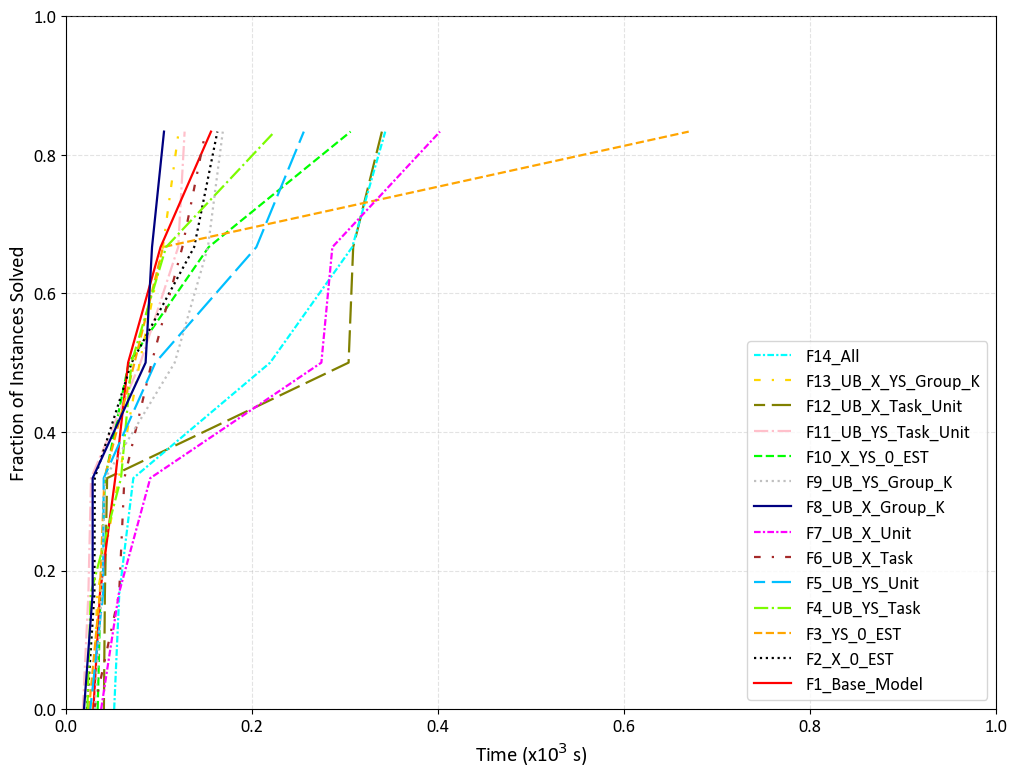

Number of unique instances before filtering: 12
Number of instances used in performance chart: 6


In [43]:

# Define custom styles for individual formulation curves
# linestyles: solid,dotted,dashed,dashdot,(5, (10, 3)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),(0, (5, 1))
# markers: D * p o ^ +
# colors: lawngreen,green,cyan,deepskyblue,royalblue,mediumpurple,darkviolet,magenta,hotpink)
formulation_styles = {

    'F1_Base_Model': {'linestyle': 'solid', 'marker': 'o', 'color': 'red'},
    'F2_X_0_EST': {'linestyle': 'dotted', 'marker': '*', 'color': 'black'},
    'F3_YS_0_EST': {'linestyle': 'dashed', 'marker': 'p', 'color': 'orange'},
    'F4_UB_YS_Task': {'linestyle': 'dashdot', 'marker': 'D', 'color': 'lawngreen'},
    'F5_UB_YS_Unit': {'linestyle': (5, (10, 3)), 'marker': 's', 'color': 'deepskyblue'},
    'F6_UB_X_Task': {'linestyle': (0, (3, 5, 1, 5)), 'marker': '^', 'color': 'brown'},
    'F7_UB_X_Unit': {'linestyle': (0, (3, 1, 1, 1)), 'marker': '+', 'color': 'magenta'},
    'F8_UB_X_Group_K': {'linestyle': 'solid', 'marker': 'o', 'color': 'navy'},
    'F9_UB_YS_Group_K': {'linestyle': 'dotted', 'marker': '*', 'color': 'silver'},
    'F10_X_YS_0_EST': {'linestyle': 'dashed', 'marker': 'p', 'color': 'lime'},
    'F11_UB_YS_Task_Unit': {'linestyle': 'dashdot', 'marker': 'D', 'color': 'pink'},
    'F12_UB_X_Task_Unit': {'linestyle': (5, (10, 3)), 'marker': 's', 'color': 'olive'},
    'F13_UB_X_YS_Group_K': {'linestyle': (0, (3, 5, 1, 5)), 'marker': '^', 'color': 'gold'},
    'F14_All': {'linestyle': (0, (3, 1, 1, 1)), 'marker': '+', 'color': 'cyan'},

}

formulation_handles = {}

# Desired order of formulations in the legend
desired_legend_order = ['F14_All', 'F13_UB_X_YS_Group_K', 'F12_UB_X_Task_Unit', 'F11_UB_YS_Task_Unit', 'F10_X_YS_0_EST', 'F9_UB_YS_Group_K', 'F8_UB_X_Group_K', 'F7_UB_X_Unit', 'F6_UB_X_Task', 'F5_UB_YS_Unit', 'F4_UB_YS_Task', 'F3_YS_0_EST', 'F2_X_0_EST', 'F1_Base_Model']

# Map raw formulation names to pretty LaTeX-style labels

""" legend_labels = {

    'ORI': r'M.P$^{\mathrm{S}}_{\mathrm{U}}$',
    'UTG.UTG': r'M.P$^{\mathrm{UT}}_{\mathrm{U}}$',
    'UTG.UTM': r'M.P$^{\mathrm{UTM}}_{\mathrm{U}}$',
    'UTG.MSG': r'M.P$^{\mathrm{M}}_{\mathrm{U}}$',
    'UTG.TSG': r'M.P$^{\mathrm{T}}_{\mathrm{U}}$',
    'UTG.USG': r'M.P$^{\mathrm{U}}_{\mathrm{U}}$',
    'UTG.SHG': r'M.P$^{\mathrm{HG}}_{\mathrm{U}}$',
    'Formulation_H': r'Formulation$_{\mathrm{H}}$'
} """

legend_labels = {
    'F14_All' : 'F14_All', 
    'F13_UB_X_YS_Group_K' : 'F13_UB_X_YS_Group_K', 
    'F12_UB_X_Task_Unit' : 'F12_UB_X_Task_Unit', 
    'F11_UB_YS_Task_Unit' : 'F11_UB_YS_Task_Unit', 
    'F10_X_YS_0_EST' : 'F10_X_YS_0_EST', 
    'F9_UB_YS_Group_K' : 'F9_UB_YS_Group_K', 
    'F8_UB_X_Group_K' : 'F8_UB_X_Group_K', 
    'F7_UB_X_Unit' : 'F7_UB_X_Unit', 
    'F6_UB_X_Task' : 'F6_UB_X_Task', 
    'F5_UB_YS_Unit' : 'F5_UB_YS_Unit', 
    'F4_UB_YS_Task' : 'F4_UB_YS_Task', 
    'F3_YS_0_EST' : 'F3_YS_0_EST', 
    'F2_X_0_EST' : 'F2_X_0_EST', 
    'F1_Base_Model' : 'F1_Base_Model'
}

# Plot performance chart
plt.figure(figsize=(12, 9))

for formulation, group in df_filtered.groupby('Formulation'):
    group_sorted = group.sort_values(by='Time (s)')  # Sort each formulation's data by time
    total_instances = len(instance_order)
    y_positions = np.arange(len(group_sorted)) / total_instances  # Normalize to [0, 1]
    style = formulation_styles.get(formulation, {'linestyle': '-', 'marker': 'o', 'color': 'red'})    

    line, = plt.plot(group_sorted['Time (s)'] /1000,
        y_positions,
        linestyle=style['linestyle'],
        # marker=style['marker'],
        color=style['color'],                 # Set the line color
        markerfacecolor=style['color'],       # Explicitly set marker face color
        markeredgecolor=style['color'],       # Explicitly set marker edge color
        markersize=5,                         # Reduced marker size
        linewidth=1.6,                          # Increase line thickness here
        label=legend_labels.get(formulation, formulation))

    formulation_handles[formulation] = line

# Set other plot properties
axis_number_size = 13
axis_label_size = 15
font_family = 'calibri'
plt.xlabel(r'Time (x10$^3$ s)', fontdict={'family': font_family, 'size': axis_label_size})
plt.ylabel("Fraction of Instances Solved", fontdict={'family': font_family, 'size': axis_label_size})
plt.xticks(fontsize=axis_number_size, fontname=font_family)
plt.yticks(fontsize=axis_number_size, fontname=font_family)
plt.tick_params(axis='x', labelsize=axis_number_size)
plt.tick_params(axis='y', labelsize=axis_number_size)
#plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
#plt.title('Performance Chart', fontdict={'family': font_family, 'size': 16, 'weight': 'bold'})
plt.grid(True, linestyle='--', alpha=0.35)
#plt.xscale('log')
plt.xlim(0, 1)
plt.ylim(0, 1.00)
top_spine = plt.gca().spines['top']
top_spine.set_zorder(0)  # Move behind the plot lines

# Filter for only the formulations that were actually plotted
ordered_handles = [formulation_handles[form] for form in desired_legend_order if form in formulation_handles]
ordered_labels = [legend_labels[form] for form in desired_legend_order if form in formulation_handles]

# Apply ordered legend
plt.legend(ordered_handles, ordered_labels, loc='lower right', prop={'family': font_family, 'size': axis_number_size})
#plt.legend(loc='lower right', title='Formulation', prop={'family': font_family, 'size': axis_number_size})
plt.show()

print(f"Number of unique instances before filtering: {df['Instance'].nunique()}")
print(f"Number of instances used in performance chart: {len(instance_order)}")
